# Assignment 2: K-Nearest Neighbor and Classification
List your team members (name and immatriculation number) in the following cell:

- *Your names here*

- In this assignment, you will implment a K-Nearest Neighbors (KNN) classifier using the famous Iris dataset. 
- The Iris dataset is a classic machine learning benchmark consisting of 150 samples of iris flowers, each described by four features: sepal length, sepal width, petal length, and petal width. The full description of the dataset can be found here: https://archive.ics.uci.edu/ml/datasets/iris
- The goal of this assignment is to train a KNN classifier on the Iris dataset to predict the species of iris flower based on its four features.
- Only use the already imported libraries. 


**In this assignment, you will implement the KNN algorithm using Python and the scikit-learn library.**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from sklearn.metrics import accuracy_score
import pandas as pd
import seaborn as sns
from collections import Counter
%matplotlib inline

# You will start by loading and exploring the Iris dataset

**Load the Iris dataset**

In [2]:
# Load the iris dataset, from UCI Machine Learning Repository
iris = datasets.load_iris()
X = iris['data']
y = iris['target']

**Print Feature Names**

In [3]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [4]:
# feature names (variable names)
iris['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

**Print Labels**

In [5]:
# independed variable
iris['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

**Create a pandas dataframe using the given data and target, and subsequently name the columns of the dataframe with the target names.**

In [6]:
import pandas as pd
iris_df = pd.DataFrame(data = iris['data'], columns = iris['feature_names'])
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


**Now add the iris type from the irs_data['target']**

In [7]:
iris_df['Iris type'] = iris['target']
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Iris type
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


**Now augment your dataset with a column "Iris name", this column should contain the Iris name ('sentosa', 'versicolor', 'virginica') based on the Iris type**

| Iris Type | Iris Name |
| --- | --- | 
| 0 | sentosa |
| 1 | versicolor |
| 2 | virginica |

In [8]:
iris_df['Iris name'] = iris_df['Iris type'].apply(lambda x: 'sentosa' if x == 0 else ('versicolor' if x == 1 else 'virginica'))
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Iris type,Iris name
0,5.1,3.5,1.4,0.2,0,sentosa
1,4.9,3.0,1.4,0.2,0,sentosa
2,4.7,3.2,1.3,0.2,0,sentosa
3,4.6,3.1,1.5,0.2,0,sentosa
4,5.0,3.6,1.4,0.2,0,sentosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica


**Now print some basic statistical details like percentile, mean, std, etc. of the dataset.**

In [9]:
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Iris type
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


**Now group data instances by their type to  better refine information**

In [10]:
iris_df.groupby(['Iris name']).describe()

sepal length (cm)                                              \
                       count   mean       std  min    25%  50%  75%  max   
Iris name                                                                  
sentosa                 50.0  5.006  0.352490  4.3  4.800  5.0  5.2  5.8   
versicolor              50.0  5.936  0.516171  4.9  5.600  5.9  6.3  7.0   
virginica               50.0  6.588  0.635880  4.9  6.225  6.5  6.9  7.9   

           sepal width (cm)         ... petal width (cm)      Iris type       \
                      count   mean  ...              75%  max     count mean   
Iris name                           ...                                        
sentosa                50.0  3.428  ...              0.3  0.6      50.0  0.0   
versicolor             50.0  2.770  ...              1.5  1.8      50.0  1.0   
virginica              50.0  2.974  ...              2.3  2.5      50.0  2.0   

                                          
            std  min  25%  50%  75%  max  
Iris name                                 
sentosa     0.0  0.0  0.0  0.0  0.0  0.0  
versicolor  0.0  1.0  1.0  1.0  1.0  1.0  
virginica   0.0  2.0  2.0  2.0  2.0  2.0  

[3 rows x 40 columns]

What can you deduce from the above output?

It can be noted that there is a noticeable difference in the sizes of the various types of iris. This distinction is evident from the mean values of the sepal length, which are 5 cm, 5.9 cm, and 6.5 cm for each flower type, respectively, thus making it easy to differentiate. However, the other measurements exhibit similar patterns, despite some minor variations in their minimum values. On the other hand, the maximum values show significant differences between the iris types. For instance, the width of the petal in versicolor is three times greater than that of setosa and 0.7 mm less than that of virginica.

# Data visualization:
**Create four violin plots that represent the data features for each iris type, with the iris name as the x-axis and the data feature as the y-axis**

In [11]:
iris_df.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'Iris type', 'Iris name'],
      dtype='object')

In [12]:
# im just making a function in order not to repeat the same code
def plot_violin(y2,i):
    plt.subplot(2,2,i)
    
    sns.violinplot(x='Iris name',y= y2, data=iris_df)

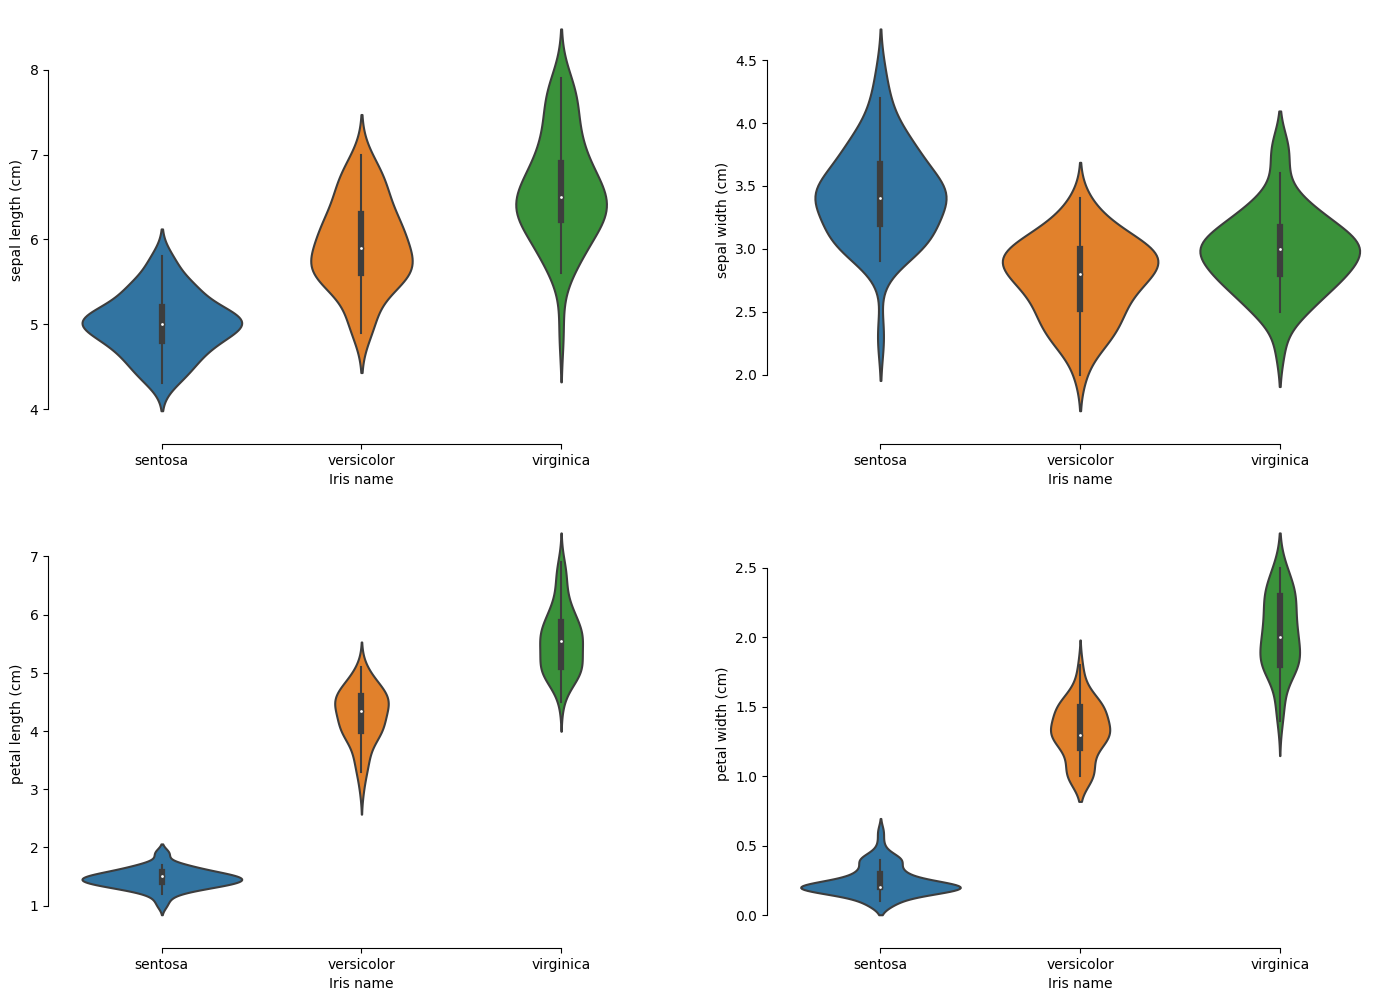

In [13]:
plt.figure(figsize=(17,12))
i = 1
for measurement in iris_df.columns[:-2]:
    plot_violin(measurement,i)
    sns.despine(offset=10, trim=True)
    i += 1
    

**Using the seaborn library, create a pairplot of the iris dataset, with the following specifications:**

**- Use the 'Iris name' column to distinguish between the different types of iris.**

**- Display the scatterplots for the 'sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', and 'petal width (cm)' columns only (set the 'vars' parameter accordingly).**



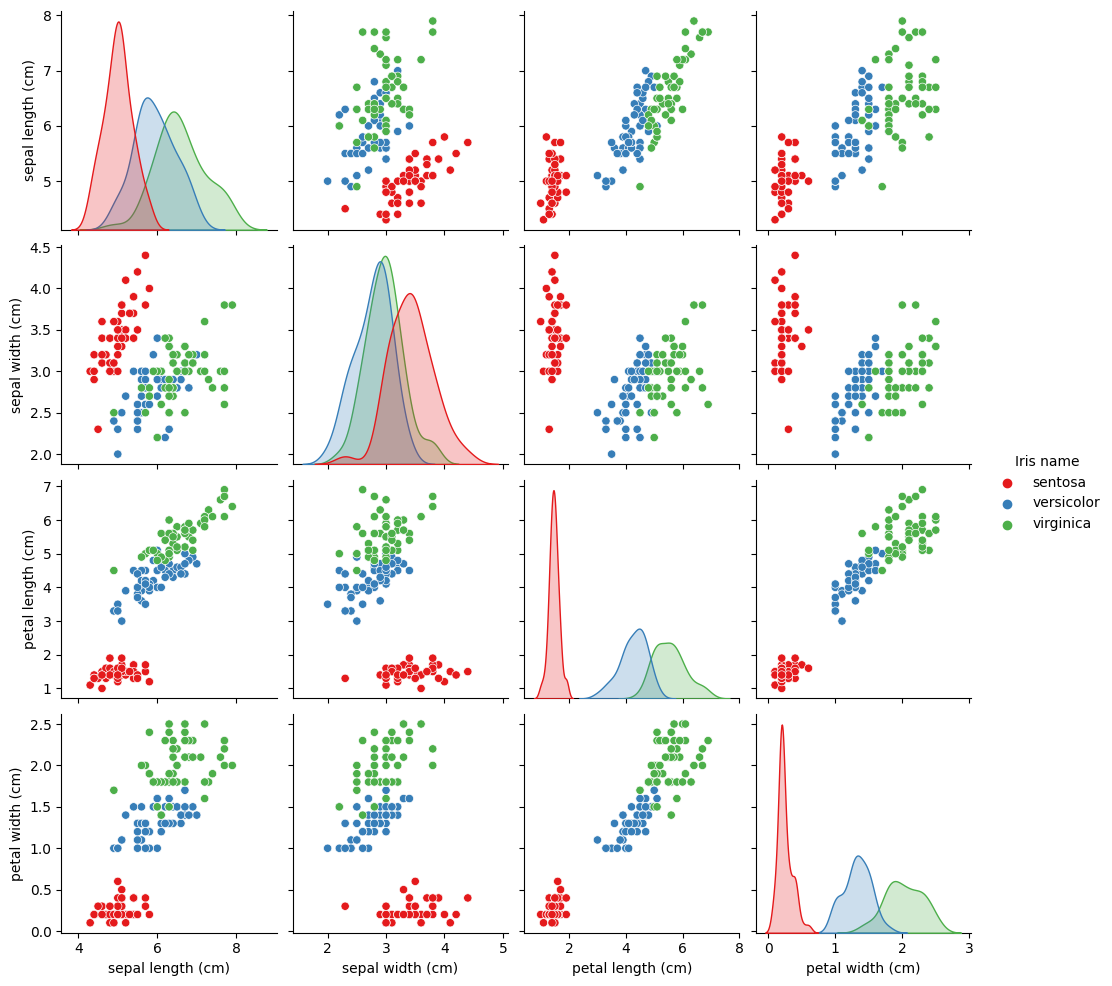

In [14]:
sns.pairplot(iris_df, hue = 'Iris name', vars = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)'], palette = 'Set1' );

**Produce a heatmap above to find out the correlations between the measurements**

In [15]:
iris_df.iloc[:,:4].corr()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,-0.117570,0.871754,0.817941
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126
petal length (cm),0.871754,-0.428440,1.000000,0.962865
petal width (cm),0.817941,-0.366126,0.962865,1.000000


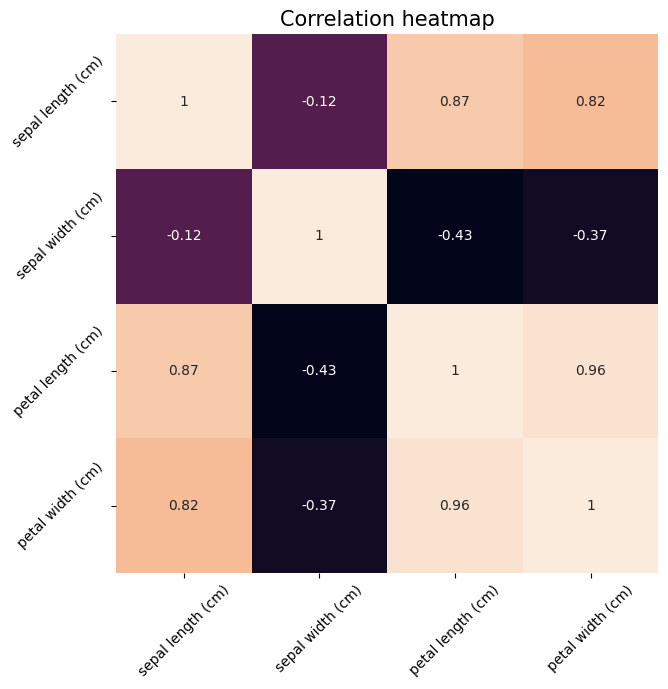

In [16]:
fig, axes = plt.subplots(figsize=(7,7))
sns.heatmap(iris_df.iloc[:,:4].corr(), annot = True, cbar=False)
axes.tick_params(labelrotation=45)
plt.title('Correlation heatmap', fontsize = 15);

# K-Nearest Neighbor for Iris dataset classification
The KNN algorithm is a simple and effective classification technique that belongs to the family of lazy learning methods. It works by computing the distances between the input data point and all the training data points in the feature space. Then, the algorithm selects the K-nearest neighbors of the input point based on their distances, and assigns the majority class of these neighbors as the predicted class of the input point. The value of K is a hyperparameter that can be tuned to achieve better accuracy on the test set.

**Now split the dataset to X (data features) and Y (labels)** 

In [17]:
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Iris type,Iris name
0,5.1,3.5,1.4,0.2,0,sentosa
1,4.9,3.0,1.4,0.2,0,sentosa
2,4.7,3.2,1.3,0.2,0,sentosa
3,4.6,3.1,1.5,0.2,0,sentosa
4,5.0,3.6,1.4,0.2,0,sentosa


In [18]:
data = iris_df.iloc[:, :-1]
x= data.iloc[:, :-1]
y= data.iloc[:, -1]

**Now split it into training and test sets, the test set should be 20% of the original dataset.**

In [19]:
x_train, x_test, y_train, y_test= train_test_split(x, y,
                                                   test_size= 0.2,
                                                   shuffle= True, #shuffle the data to avoid bias
                                                   random_state= 0)
x_train= np.asarray(x_train)
y_train= np.asarray(y_train)

x_test= np.asarray(x_test)
y_test= np.asarray(y_test)


In [20]:
print(f'training set size: {x_train.shape[0]} samples \ntest set size: {x_test.shape[0]} samples')

training set size: 120 samples 
test set size: 30 samples


**Normalize the dataset**

In [21]:
scaler= Normalizer().fit(x_train) # the scaler is fitted to the training set
normalized_x_train= scaler.transform(x_train) # the scaler is applied to the training set
normalized_x_test= scaler.transform(x_test) # the scaler is applied to the test set

In [22]:
print('x train before Normalization')
print(x_train[0:5])
print('\nx train after Normalization')
print(normalized_x_train[0:5])

x train before Normalization
[[6.4 3.1 5.5 1.8]
 [5.4 3.  4.5 1.5]
 [5.2 3.5 1.5 0.2]
 [6.1 3.  4.9 1.8]
 [6.4 2.8 5.6 2.2]]

x train after Normalization
[[0.69804799 0.338117   0.59988499 0.196326  ]
 [0.69333409 0.38518561 0.57777841 0.1925928 ]
 [0.80641965 0.54278246 0.23262105 0.03101614]
 [0.71171214 0.35002236 0.57170319 0.21001342]
 [0.69417747 0.30370264 0.60740528 0.2386235 ]]


# Step 1 (Euclidean Distance):
- To compute the distances between the input data point and all the training data points in the feature space, we need to implement the distance function
- Implement a function to calculate the Euclidean distance between two data points 

In [23]:
def distance_ecu(x_train, x_test_point):
  """
  Input:
    - x_train: corresponding to the training data
    - x_test_point: corresponding to the test point

  Output:
    -distances: The distances between the test point and each point in the training data.

  """
  distances= []  ## create empty list called distances
  for row in range(len(x_train)): ## Loop over the rows of x_train
      current_train_point= x_train[row] #Get them point by point
      current_distance= 0 ## initialize the distance by zero

      for col in range(len(current_train_point)): ## Loop over the columns of the row
          
          current_distance += (current_train_point[col] - x_test_point[col]) **2
          ## Or current_distance = current_distance + (x_train[i] - x_test_point[i])**2
      current_distance= np.sqrt(current_distance)

      distances.append(current_distance) ## Append the distances

  # Store distances in a dataframe
  distances= pd.DataFrame(data=distances,columns=['dist'])
  return distances


# Step 2 (Find the nearest neighbors):
- Implement a function to compute the K nearest neighbors to a single data point

In [24]:
def nearest_neighbors(distance_point, K):
    """
    Input:
        -distance_point: the distances between the test point and each point in the training data.
        -K             : the number of neighbors

    Output:
        -df_nearest: the nearest K neighbors between the test point and the training data.

    """

    # Sort values using the sort_values function
    df_nearest= distance_point.sort_values(by=['dist'], axis=0)

    ## Take only the first K neighbors
    df_nearest= df_nearest[:K]
    return df_nearest


# Step 3 (Classify the point based on a majority vote):
- Implement a function to assign the label to a data point based on the majority vote of the K nearest neighbors

In [25]:
def voting(df_nearest, y_train):
    """
    Input:
        -df_nearest: dataframe contains the nearest K neighbors between the full training dataset and the test point.
        -y_train: the labels of the training dataset.

    Output:
        -y_pred: the prediction based on Majority Voting

    """

    ## Use the Counter Object to get the labels with K nearest neighbors.
    counter_vote= Counter(y_train[df_nearest.index])

    y_pred= counter_vote.most_common()[0][0]   # Majority Voting

    return y_pred

# Step 4 Full Algorithm:
- Implement a function to combine the helper functions you implemented previously

In [26]:
def KNN_from_scratch(x_train, y_train, x_test, K):

    """
    Input:
    -x_train: the full training dataset
    -y_train: the labels of the training dataset
    -x_test: the full test dataset
    -K: the number of neighbors

    Output:
    -y_pred: the prediction for the whole test set based on Majority Voting.

    """

    y_pred=[]

    ## Loop over all the test set and perform the three steps
    for x_test_point in x_test:
      distance_point  = distance_ecu(x_train, x_test_point)  ## Step 1
      df_nearest_point= nearest_neighbors(distance_point, K)  ## Step 2
      y_pred_point    = voting(df_nearest_point, y_train) ## Step 3
      y_pred.append(y_pred_point)

    return y_pred  

**Test the KNN Algorithm on the test dataset using K = 3**

In [27]:
K=3
y_pred_scratch= KNN_from_scratch(normalized_x_train, y_train, normalized_x_test, K)
print(y_pred_scratch)

[2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 2, 0, 0, 2, 1, 0, 0, 2, 0, 0, 1, 1, 0]


**Evaluate the performance of your implemented classifier by computing the accuracy**

In [28]:
print(f'The accuracy of our implementation is {accuracy_score(y_test, y_pred_scratch)}')

The accuracy of our implementation is 0.9666666666666667


**Implement a functoin to perform Hyper-parameter Tuning using K-fold Cross Validation**

In [29]:
n_splits= 4 ## Choose the number of splits
kf= KFold(n_splits= n_splits) ## Call the K Fold function

accuracy_k= [] ## Keep track of the accuracy for each K
k_values= list(range(1,30,2)) ## Search for the best value of K

for k in k_values: ## Loop over the K values
  accuracy_fold= 0
  for normalized_x_train_fold_idx, normalized_x_valid_fold_idx in  kf.split(normalized_x_train): ## Loop over the splits
      normalized_x_train_fold= normalized_x_train[normalized_x_train_fold_idx] ## fetch the values
      y_train_fold= y_train[normalized_x_train_fold_idx]

      normalized_x_test_fold= normalized_x_train[normalized_x_valid_fold_idx]
      y_valid_fold= y_train[normalized_x_valid_fold_idx]
      y_pred_fold= KNN_from_scratch(normalized_x_train_fold, y_train_fold, normalized_x_test_fold, k)

      accuracy_fold+= accuracy_score (y_pred_fold, y_valid_fold) ## Accumulate the accuracy
  accuracy_fold= accuracy_fold/ n_splits ## Divide by the number of splits
  accuracy_k.append(accuracy_fold)

**To evaluate the performance of your implemented classifier with different values of K:**

**- Compute the accuracy of the classifier for each K**

**- Compute the best accuracy**


In [30]:
print(f'The accuracy for each K value was {list ( zip (accuracy_k, k_values))}') ## creates a tuple with accuracy corresponding to k value

The accuracy for each K value was [(0.9666666666666668, 1), (0.9666666666666668, 3), (0.9666666666666668, 5), (0.9666666666666668, 7), (0.9583333333333333, 9), (0.9583333333333333, 11), (0.9583333333333334, 13), (0.95, 15), (0.9583333333333333, 17), (0.9583333333333333, 19), (0.9583333333333333, 21), (0.9583333333333333, 23), (0.9583333333333333, 25), (0.9583333333333333, 27), (0.9583333333333333, 29)]


In [31]:
print(f'Best accuracy was {np.max(accuracy_k)}, which corresponds to a value of K= {k_values[np.argmax(accuracy_k)]}')

Best accuracy was 0.9666666666666668, which corresponds to a value of K= 1


# Step 5 Visualize the performance of you classifier:
- Create a line graph to visualize the performance of your KNN classifier with different values of K, using the accuracy list as the y-values and the range of K value as the x-values.

- Your graph should have a title and labels for the x-axis and y-axis.

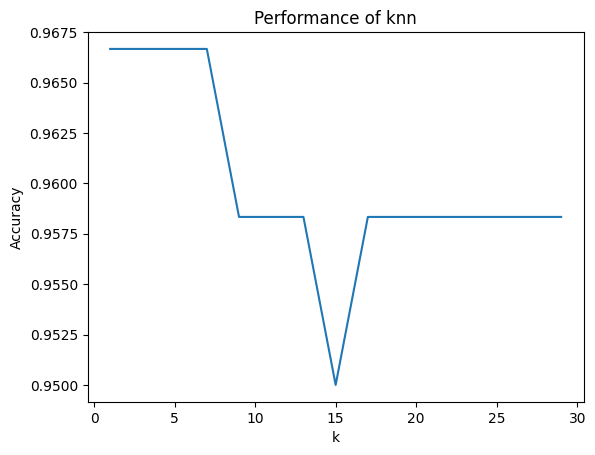

In [32]:
fig, ax = plt.subplots()
ax.plot(k_values, accuracy_k)
ax.set(xlabel="k",
       ylabel="Accuracy",
       title="Performance of knn")
plt.show()